In [1]:
import warnings
warnings.filterwarnings('ignore')

#import os
#os.environ["TF_CPP_MIN-LOG_LEVEL"] = "3"

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target),(test_input,test_target)= keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled,train_target,test_size=0.2, random_state=42
)

In [3]:
# Model 함수 구현
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [4]:
model = model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(loss='sparse_categorical_crossentropy', metrics="accuracy")
history = model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5


2022-07-20 16:46:42.367240: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1500/1500 [==============================] - 1s 692us/step - loss: 0.5309 - accuracy: 0.8142
Epoch 2/5
1500/1500 [==============================] - 1s 742us/step - loss: 0.3910 - accuracy: 0.8600
Epoch 3/5
1500/1500 [==============================] - 1s 865us/step - loss: 0.3535 - accuracy: 0.8737
Epoch 4/5
1500/1500 [==============================] - 1s 766us/step - loss: 0.3322 - accuracy: 0.8808
Epoch 5/5
1500/1500 [==============================] - 1s 714us/step - loss: 0.3166 - accuracy: 0.8874


In [6]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

---
# 손실곡선

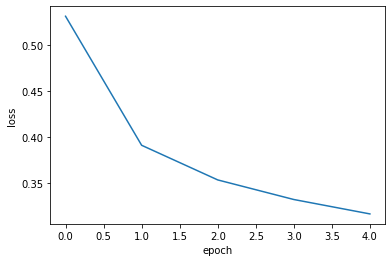

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

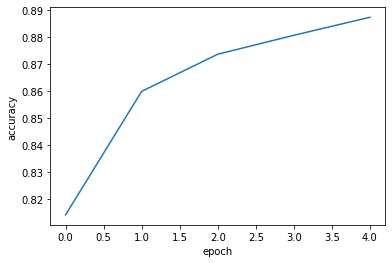

In [8]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

---
# 반복훈련의 증가

In [9]:
model.compile(loss='sparse_categorical_crossentropy', metrics="accuracy")
history = model.fit(train_scaled, train_target, epochs=50)

Epoch 1/50
1500/1500 [==============================] - 1s 720us/step - loss: 0.3066 - accuracy: 0.8918
Epoch 2/50
1500/1500 [==============================] - 1s 922us/step - loss: 0.2966 - accuracy: 0.8963
Epoch 3/50
1500/1500 [==============================] - 1s 770us/step - loss: 0.2872 - accuracy: 0.9016
Epoch 4/50
1500/1500 [==============================] - 1s 780us/step - loss: 0.2799 - accuracy: 0.9025
Epoch 5/50
1500/1500 [==============================] - 1s 821us/step - loss: 0.2730 - accuracy: 0.9055
Epoch 6/50
1500/1500 [==============================] - 1s 741us/step - loss: 0.2688 - accuracy: 0.9075
Epoch 7/50
1500/1500 [==============================] - 1s 757us/step - loss: 0.2632 - accuracy: 0.9087
Epoch 8/50
1500/1500 [==============================] - 1s 791us/step - loss: 0.2587 - accuracy: 0.9114
Epoch 9/50
1500/1500 [==============================] - 1s 788us/step - loss: 0.2545 - accuracy: 0.9138
Epoch 10/50
1500/1500 [==============================] - 1s 696u

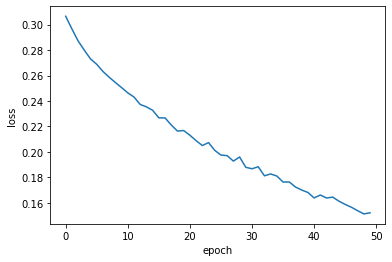

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

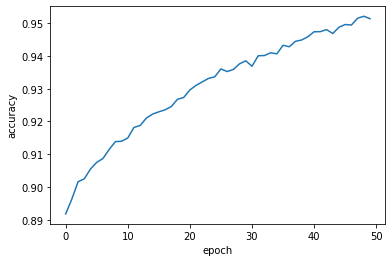

In [11]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

---
### 검증 손실
: 검증 세트에 대한 정확도를 파악하기 위해 validation data를 사용한다.

In [12]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data = (val_scaled, val_target)
                    )

Epoch 1/20
1500/1500 [==============================] - 1s 839us/step - loss: 0.5330 - accuracy: 0.8128 - val_loss: 0.4336 - val_accuracy: 0.8469
Epoch 2/20
1500/1500 [==============================] - 1s 862us/step - loss: 0.3893 - accuracy: 0.8596 - val_loss: 0.4438 - val_accuracy: 0.8388
Epoch 3/20
1500/1500 [==============================] - 1s 861us/step - loss: 0.3533 - accuracy: 0.8713 - val_loss: 0.3737 - val_accuracy: 0.8711
Epoch 4/20
1500/1500 [==============================] - 1s 786us/step - loss: 0.3319 - accuracy: 0.8807 - val_loss: 0.3614 - val_accuracy: 0.8726
Epoch 5/20
1500/1500 [==============================] - 1s 830us/step - loss: 0.3168 - accuracy: 0.8864 - val_loss: 0.3685 - val_accuracy: 0.8754
Epoch 6/20
1500/1500 [==============================] - 1s 797us/step - loss: 0.3062 - accuracy: 0.8918 - val_loss: 0.3666 - val_accuracy: 0.8795
Epoch 7/20
1500/1500 [==============================] - 1s 799us/step - loss: 0.2963 - accuracy: 0.8943 - val_loss: 0.3753 -

In [13]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

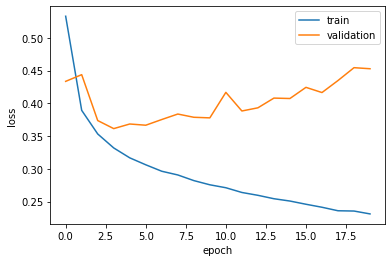

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','validation'])
plt.show()

> 훈련 세트는 epochs가 증가함에 따라 손실이 떨어지고 있으나    
> 검증 세트는 epochs가 증가함에 따라 초반에는 손실이 떨어지나 진행하면 할수록 손실율이 증가한다.    
> 이 모델은 훈련셑에는 정확도가 높아 좋지만, 검증세트에는 적합하지 않는 과대적합 모델이다.

---
Optimizer(adam)

In [15]:
model = model_fn()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data = (val_scaled, val_target)
                    )

Epoch 1/20
1500/1500 [==============================] - 2s 889us/step - loss: 0.5264 - accuracy: 0.8158 - val_loss: 0.4709 - val_accuracy: 0.8308
Epoch 2/20
1500/1500 [==============================] - 1s 839us/step - loss: 0.3940 - accuracy: 0.8589 - val_loss: 0.3830 - val_accuracy: 0.8670
Epoch 3/20
1500/1500 [==============================] - 1s 756us/step - loss: 0.3559 - accuracy: 0.8716 - val_loss: 0.3741 - val_accuracy: 0.8660
Epoch 4/20
1500/1500 [==============================] - 1s 758us/step - loss: 0.3291 - accuracy: 0.8796 - val_loss: 0.3447 - val_accuracy: 0.8754
Epoch 5/20
1500/1500 [==============================] - 1s 784us/step - loss: 0.3081 - accuracy: 0.8869 - val_loss: 0.3417 - val_accuracy: 0.8758
Epoch 6/20
1500/1500 [==============================] - 1s 773us/step - loss: 0.2932 - accuracy: 0.8930 - val_loss: 0.3404 - val_accuracy: 0.8771
Epoch 7/20
1500/1500 [==============================] - 1s 707us/step - loss: 0.2800 - accuracy: 0.8975 - val_loss: 0.3273 -

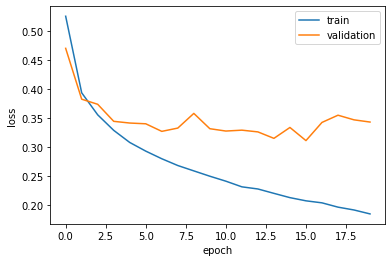

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','validation'])
plt.show()

> 훈련 세트는 epochs가 증가함에 따라 손실이 떨어지고 있으나    
> 검증 세트는 epochs가 증가함에 따라 초반에는 손실이 떨어지나 진행하면 할수록 손실율이 증가한다.    
> 이 모델은 훈련셑에는 정확도가 높아 좋지만, 검증세트에는 적합하지 않는 과대적합 모델이다.    
> Optimizer(최적화 알고리즘)을 사용한 것이 좀더 나은 모델이나 검증손실에 대한 부분(과대적합)은 아직 해결이 안되었음.

---
# Dropout
- 규제
- 신경망 모델에만 있음
- 훈련시에만 각 sample을 처리할 때 은닉층의 임의의 node를 계산에 포함시키지 않는다.

In [17]:
# model에 dropout을 추가
model = model_fn(keras.layers.Dropout(0.3)) # drop out 30%
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data = (val_scaled, val_target)
                    )

Epoch 1/20
1500/1500 [==============================] - 2s 876us/step - loss: 0.5906 - accuracy: 0.7920 - val_loss: 0.4188 - val_accuracy: 0.8494
Epoch 2/20
1500/1500 [==============================] - 1s 769us/step - loss: 0.4384 - accuracy: 0.8444 - val_loss: 0.3889 - val_accuracy: 0.8608
Epoch 3/20
1500/1500 [==============================] - 1s 772us/step - loss: 0.4013 - accuracy: 0.8542 - val_loss: 0.3710 - val_accuracy: 0.8630
Epoch 4/20
1500/1500 [==============================] - 1s 730us/step - loss: 0.3798 - accuracy: 0.8615 - val_loss: 0.3599 - val_accuracy: 0.8668
Epoch 5/20
1500/1500 [==============================] - 1s 769us/step - loss: 0.3690 - accuracy: 0.8664 - val_loss: 0.3508 - val_accuracy: 0.8745
Epoch 6/20
1500/1500 [==============================] - 1s 772us/step - loss: 0.3533 - accuracy: 0.8703 - val_loss: 0.3491 - val_accuracy: 0.8724
Epoch 7/20
1500/1500 [==============================] - 1s 743us/step - loss: 0.3422 - accuracy: 0.8745 - val_loss: 0.3346 -

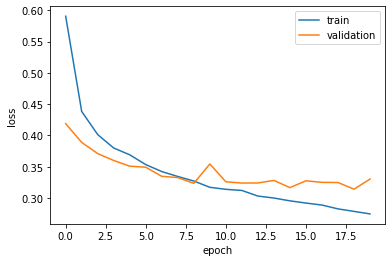

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','validation'])
plt.show()

> epochs가 10일 경우가 train과 val의 차이가 적은 것 같다.    
> 기본적으로 훈련세트의 손실이 검증세트보다 적게 나오는 epoch의 갯수를 선택한다.

---
### 모델의 저장과 복원
- hdf5 format으로 저장


In [20]:
# model 저장
model.save("../Data/model-whole.h5")

In [21]:
# 복원
model = keras.models.load_model("../Data/model-whole.h5")

In [22]:
# 사용
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 408us/step - loss: 0.3302 - accuracy: 0.8847


[0.3302460014820099, 0.8846666812896729]

---
# Callbacks
- 훈련수행시 손실값이 제일 작은 함수를 저장해준다. <- 굉장히 편함 ㅋㅋㅋㅋㅋㅋ

In [23]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint("../Data/best-model.h5")
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data = (val_scaled, val_target),
                    callbacks = [checkpoint_cb]
                    )

Epoch 1/20
1500/1500 [==============================] - 2s 975us/step - loss: 0.5990 - accuracy: 0.7893 - val_loss: 0.4519 - val_accuracy: 0.8398
Epoch 2/20
1500/1500 [==============================] - 1s 962us/step - loss: 0.4509 - accuracy: 0.8419 - val_loss: 0.4272 - val_accuracy: 0.8468
Epoch 3/20
1500/1500 [==============================] - 1s 851us/step - loss: 0.4254 - accuracy: 0.8524 - val_loss: 0.3973 - val_accuracy: 0.8613
Epoch 4/20
1500/1500 [==============================] - 1s 826us/step - loss: 0.4106 - accuracy: 0.8590 - val_loss: 0.3712 - val_accuracy: 0.8713
Epoch 5/20
1500/1500 [==============================] - 1s 826us/step - loss: 0.4042 - accuracy: 0.8620 - val_loss: 0.3771 - val_accuracy: 0.8742
Epoch 6/20
1500/1500 [==============================] - 1s 824us/step - loss: 0.3994 - accuracy: 0.8649 - val_loss: 0.4100 - val_accuracy: 0.8720
Epoch 7/20
1500/1500 [==============================] - 1s 830us/step - loss: 0.3948 - accuracy: 0.8683 - val_loss: 0.3826 -

In [24]:
model = keras.models.load_model("../Data/best-model.h5")
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 0s 432us/step - loss: 0.4634 - accuracy: 0.8749


[0.4634200930595398, 0.874916672706604]

---
# Early-Stopping(조기 종료)
- callbacks처럼 끝까지 기다리는 것이 아니고 hyper parameter를 선정하여 한계값을 정해 실행한다.

In [25]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint("../Data/best-model.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data = (val_scaled, val_target),
                    callbacks = [checkpoint_cb, early_stopping_cb],
                    )

Epoch 1/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5915 - accuracy: 0.7928 - val_loss: 0.4280 - val_accuracy: 0.8457
Epoch 2/20
1500/1500 [==============================] - 1s 978us/step - loss: 0.4464 - accuracy: 0.8409 - val_loss: 0.4128 - val_accuracy: 0.8512
Epoch 3/20
1500/1500 [==============================] - 1s 820us/step - loss: 0.4201 - accuracy: 0.8516 - val_loss: 0.3819 - val_accuracy: 0.8665
Epoch 4/20
1500/1500 [==============================] - 1s 819us/step - loss: 0.4056 - accuracy: 0.8587 - val_loss: 0.3955 - val_accuracy: 0.8674
Epoch 5/20
1500/1500 [==============================] - 1s 824us/step - loss: 0.3990 - accuracy: 0.8623 - val_loss: 0.3774 - val_accuracy: 0.8752
Epoch 6/20
1500/1500 [==============================] - 1s 836us/step - loss: 0.3930 - accuracy: 0.8653 - val_loss: 0.4011 - val_accuracy: 0.8646
Epoch 7/20
1500/1500 [==============================] - 1s 819us/step - loss: 0.3918 - accuracy: 0.8688 - val_loss: 0.3763 - v

In [26]:
# 몇번째 epochs에서 stop 되었는가
early_stopping_cb.stopped_epoch

8

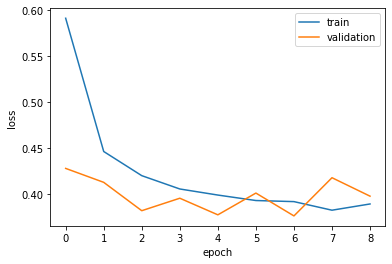

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','validation'])
plt.show()